In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
from scipy import stats

# 1.Down

In [2]:
dat = pd.read_csv('/home/lzz/hic/output/PC/regions.Down_b_vs_s.txt', sep='\t')
print(dat.shape)
dat.head()

(264, 27)


,PeakID (cmd=annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph) (cmd=getDiffExpression.pl /home/u2204084007/output/hic//ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Description,Gene Type,/home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph bedGraph avg over given bp,s vs. b Difference,s vs. b p-value,s vs. b adj. p-value
0,chr19-27800000,chr19,27800000,27840000,+,0.180673,NaN,"intron (NM_001166414, intron 9 of 18)","intron (NM_001166414, intron 9 of 18)",189773,...,"regulatory factor X, 3 (influences HLA class I...",protein-coding,0.181,0.132,-0.494,-0.465,-0.525,-0.651167,0.000008,0.043094
1,chr17-66360000,chr17,66360000,66400000,+,-0.005986,NaN,"exon (NM_001114098, exon 5 of 15)","exon (NM_001114098, exon 5 of 15)",69750,...,microtubule crosslinking factor 1,protein-coding,-0.006,-0.036,-0.600,-0.591,-0.594,-0.574000,0.000012,0.043094
2,chr6-94280000,chr6,94280000,94320000,+,0.210921,NaN,Intergenic,B2_Mm2|SINE|B2,-16083,...,"membrane associated guanylate kinase, WW and P...",protein-coding,0.211,0.196,-0.382,-0.411,-0.354,-0.585833,0.000013,0.043094
3,chr10-70440000,chr10,70440000,70480000,+,-0.413796,NaN,"intron (NM_001359551, intron 4 of 14)",B3A|SINE|B2,19090,...,"family with sequence similarity 13, member C",protein-coding,-0.414,-0.464,-1.036,-1.095,-1.144,-0.652667,0.000015,0.043094
4,chr6-92760000,chr6,92760000,92800000,+,-0.155394,NaN,"intron (NM_175314, intron 38 of 39)","intron (NM_175314, intron 38 of 39)",-73816,...,prickle planar cell polarity protein 2,protein-coding,-0.155,-0.219,-0.808,-0.757,-0.807,-0.603667,0.000015,0.043094


In [3]:
dat['Nearest Ensembl'].unique()

array(['ENSMUSG00000040929', 'ENSMUSG00000052105', 'ENSMUSG00000045095',
       'ENSMUSG00000043259', 'ENSMUSG00000030020', 'ENSMUSG00000074235',
       'ENSMUSG00000037605', 'ENSMUSG00000021745', 'ENSMUSG00000117264',
       'ENSMUSG00000043556', 'ENSMUSG00000052560', 'ENSMUSG00000093812',
       'ENSMUSG00000049690', 'ENSMUSG00000051224', nan,
       'ENSMUSG00000031154', 'ENSMUSG00000030022', 'ENSMUSG00000020674',
       'ENSMUSG00000029613', 'ENSMUSG00000031176', 'ENSMUSG00000030516',
       'ENSMUSG00000000142', 'ENSMUSG00000047907', 'ENSMUSG00000019889',
       'ENSMUSG00000026344', 'ENSMUSG00000020105', 'ENSMUSG00000017978',
       'ENSMUSG00000039943', 'ENSMUSG00000052854', 'ENSMUSG00000028036',
       'ENSMUSG00000024921', 'ENSMUSG00000021348', 'ENSMUSG00000048978',
       'ENSMUSG00000073805', 'ENSMUSG00000079644', 'ENSMUSG00000054690',
       'ENSMUSG00000059602', 'ENSMUSG00000053199', 'ENSMUSG00000071646',
       'ENSMUSG00000039246', 'ENSMUSG00000030518', 'ENSMUSG000000313

In [4]:
dds = ad.read_h5ad('/home/lzz/rna/data/dds.h5ad')
dds

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [5]:
dds.var_names = dds.var_names.str.split('.').str[0]

In [6]:
dat_id = pd.Series(dat['Nearest Ensembl'].unique())
pd.Series(dat_id.isin(dds.var_names)).value_counts()

True     125
False     42
Name: count, dtype: int64

In [7]:
id_list = dds.var_names.intersection(dat['Nearest Ensembl'].unique())
id_list

Index(['ENSMUSG00000000142', 'ENSMUSG00000000884', 'ENSMUSG00000002688',
       'ENSMUSG00000006014', 'ENSMUSG00000015533', 'ENSMUSG00000017978',
       'ENSMUSG00000019762', 'ENSMUSG00000019889', 'ENSMUSG00000019891',
       'ENSMUSG00000019966',
       ...
       'ENSMUSG00000063142', 'ENSMUSG00000070544', 'ENSMUSG00000071646',
       'ENSMUSG00000072844', 'ENSMUSG00000073805', 'ENSMUSG00000074354',
       'ENSMUSG00000074925', 'ENSMUSG00000098132', 'ENSMUSG00000109097',
       'ENSMUSG00000112532'],
      dtype='object', length=125)

In [8]:
dds_sub = dds[: , id_list]
dds_sub

View of AnnData object with n_obs × n_vars = 6 × 125
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [9]:
dat_pt = pd.DataFrame(dds_sub.layers['normed_counts'], index=dds_sub.obs_names, columns=dds_sub.var_names)
dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()
dat_pt_avg


/tmp/ipykernel_11140/3788985237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()


,ENSMUSG00000000142,ENSMUSG00000000884,ENSMUSG00000002688,ENSMUSG00000006014,ENSMUSG00000015533,ENSMUSG00000017978,ENSMUSG00000019762,ENSMUSG00000019889,ENSMUSG00000019891,ENSMUSG00000019966,...,ENSMUSG00000063142,ENSMUSG00000070544,ENSMUSG00000071646,ENSMUSG00000072844,ENSMUSG00000073805,ENSMUSG00000074354,ENSMUSG00000074925,ENSMUSG00000098132,ENSMUSG00000109097,ENSMUSG00000112532
condition,,,,,,,,,,,,,,,,,,,,,
BLM,678.000416,98.558473,242.375936,82.516027,948.234887,444.906859,3.531712,1357.778845,365.191763,4268.595773,...,4.358751,3115.389763,3639.413017,3.552735,13.769642,3.266109,1410.569474,14.004444,5.031683,49.627063
PBS,1026.392781,79.738247,334.314038,62.148504,1149.147943,664.980174,12.513893,2011.215464,483.965667,7339.286587,...,4.354714,3394.551899,3520.491448,5.466510,17.008566,1.359846,1847.213022,11.476816,6.221957,65.702474


In [10]:
dat_pt_avg_log = np.log2(dat_pt_avg+1)
dat_pt_avg_log

,ENSMUSG00000000142,ENSMUSG00000000884,ENSMUSG00000002688,ENSMUSG00000006014,ENSMUSG00000015533,ENSMUSG00000017978,ENSMUSG00000019762,ENSMUSG00000019889,ENSMUSG00000019891,ENSMUSG00000019966,...,ENSMUSG00000063142,ENSMUSG00000070544,ENSMUSG00000071646,ENSMUSG00000072844,ENSMUSG00000073805,ENSMUSG00000074354,ENSMUSG00000074925,ENSMUSG00000098132,ENSMUSG00000109097,ENSMUSG00000112532
condition,,,,,,,,,,,,,,,,,,,,,
BLM,9.407269,6.637472,7.927043,6.383981,9.890621,8.800599,2.180056,10.408095,8.516456,12.059884,...,2.421897,11.60566,11.829886,2.186733,3.884563,2.092921,10.463084,3.907318,2.592561,5.661837
PBS,10.004772,6.335180,8.389369,5.980677,10.167604,9.379335,3.756371,10.974569,8.921739,12.841621,...,2.420810,11.72943,11.781971,2.692987,4.170611,1.238693,10.851915,3.641178,2.852390,6.059668


In [11]:
dat_pt_avg_log_reshaped = dat_pt_avg_log.reset_index().melt(id_vars='condition', var_name='ENSMUSG', value_name='log_value')
dat_pt_avg_log_reshaped['condition'] = dat_pt_avg_log_reshaped['condition'].cat.reorder_categories(['PBS', 'BLM'])
dat_pt_avg_log_reshaped

,condition,ENSMUSG,log_value
0,BLM,ENSMUSG00000000142,9.407269
1,PBS,ENSMUSG00000000142,10.004772
2,BLM,ENSMUSG00000000884,6.637472
3,PBS,ENSMUSG00000000884,6.335180
4,BLM,ENSMUSG00000002688,7.927043
...,...,...,...
245,PBS,ENSMUSG00000098132,3.641178
246,BLM,ENSMUSG00000109097,2.592561
247,PBS,ENSMUSG00000109097,2.852390
248,BLM,ENSMUSG00000112532,5.661837


In [12]:
condition1 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'BLM']['log_value']
condition2 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'PBS']['log_value']
w_statistic, p_value = stats.wilcoxon(condition1, condition2)
w_statistic, p_value


(1785.0, 1.1353427831504326e-07)

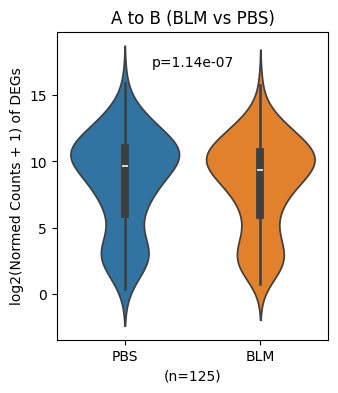

In [15]:
plt.figure(figsize=(3.5, 4))
sns.violinplot(data=dat_pt_avg_log_reshaped, x='condition', y='log_value', hue='condition')
plt.title('A to B (BLM vs PBS)')
plt.xlabel(f'(n={dat_pt_avg_log.shape[1]})')
plt.ylabel('log2(Normed Counts + 1) of DEGs')
plt.text(0.5, 0.9, f'p={p_value:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('A2B_normCount.pdf', bbox_inches='tight')

# 2.Up

In [16]:
dat = pd.read_csv('/home/lzz/hic/output/PC/regions.Up_b_vs_s.txt', sep='\t')
print(dat.shape)
dat.head()

(305, 27)


,PeakID (cmd=annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph) (cmd=getDiffExpression.pl /home/u2204084007/output/hic//ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Description,Gene Type,/home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph bedGraph avg over given bp,s vs. b Difference,s vs. b p-value,s vs. b adj. p-value
0,chr10-130360000,chr10,130360000,130400000,+,-0.720641,NaN,Intergenic,Intergenic,14241,...,"vomeronasal 2, receptor 84",protein-coding,-0.721,-0.697,0.065,0.062,0.062,0.772000,0.000002,0.043094
1,chr18-81520000,chr18,81520000,81560000,+,-0.403031,NaN,Intergenic,(TG)n|Simple_repeat|Simple_repeat,452080,...,microRNA 5127,ncRNA,-0.403,-0.403,0.481,0.452,0.359,0.833667,0.000004,0.043094
2,chr12-115160000,chr12,115160000,115200000,+,-0.906716,NaN,Intergenic,ORR1A2-int|LTR|ERVL-MaLR,515794,...,microRNA 6388,ncRNA,-0.907,-0.931,-0.278,-0.281,-0.251,0.649000,0.000006,0.043094
3,chr6-40760000,chr6,40760000,40800000,+,-0.747445,NaN,Intergenic,B4A|SINE|B4,107494,...,"monooxygenase, DBH-like 2",protein-coding,-0.747,-0.758,-0.143,-0.108,-0.149,0.619167,0.000008,0.043094
4,chr7-106760000,chr7,106760000,106800000,+,-0.747274,NaN,Intergenic,L1_Mur3|LINE|L1,10999,...,olfactory receptor 699,protein-coding,-0.747,-0.792,0.061,-0.074,0.054,0.783167,0.000009,0.043094


In [17]:
dat['Nearest Ensembl'].unique()

array(['ENSMUSG00000070601', 'ENSMUSG00000093036', 'ENSMUSG00000098336',
       'ENSMUSG00000029885', 'ENSMUSG00000096714', 'ENSMUSG00000072663',
       'ENSMUSG00000036334', 'ENSMUSG00000069911', 'ENSMUSG00000028019',
       'ENSMUSG00000043529', 'ENSMUSG00000078942', nan,
       'ENSMUSG00000102069', 'ENSMUSG00000073006', 'ENSMUSG00000063779',
       'ENSMUSG00000043753', 'ENSMUSG00000056553', 'ENSMUSG00000063663',
       'ENSMUSG00000038608', 'ENSMUSG00000038679', 'ENSMUSG00000001986',
       'ENSMUSG00000055137', 'ENSMUSG00000061769', 'ENSMUSG00000068587',
       'ENSMUSG00000101969', 'ENSMUSG00000020143', 'ENSMUSG00000115520',
       'ENSMUSG00000098357', 'ENSMUSG00000072664', 'ENSMUSG00000097069',
       'ENSMUSG00000034833', 'ENSMUSG00000008845', 'ENSMUSG00000078780',
       'ENSMUSG00000030657', 'ENSMUSG00000090176', 'ENSMUSG00000073900',
       'ENSMUSG00000027902', 'ENSMUSG00000040003', 'ENSMUSG00000047909',
       'ENSMUSG00000116611', 'ENSMUSG00000095071', 'ENSMUSG000000344

In [18]:
dds = ad.read_h5ad('/home/lzz/rna/data/dds.h5ad')
dds

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [19]:
dds.var_names = dds.var_names.str.split('.').str[0]

In [20]:
dat_id = pd.Series(dat['Nearest Ensembl'].unique())
pd.Series(dat_id.isin(dds.var_names)).value_counts()

True     115
False     67
Name: count, dtype: int64

In [21]:
id_list = dds.var_names.intersection(dat['Nearest Ensembl'].unique())
id_list

Index(['ENSMUSG00000001986', 'ENSMUSG00000002699', 'ENSMUSG00000003882',
       'ENSMUSG00000008845', 'ENSMUSG00000015316', 'ENSMUSG00000015355',
       'ENSMUSG00000018654', 'ENSMUSG00000019122', 'ENSMUSG00000019866',
       'ENSMUSG00000020122',
       ...
       'ENSMUSG00000078942', 'ENSMUSG00000079427', 'ENSMUSG00000089727',
       'ENSMUSG00000090176', 'ENSMUSG00000092528', 'ENSMUSG00000093668',
       'ENSMUSG00000095788', 'ENSMUSG00000096630', 'ENSMUSG00000097069',
       'ENSMUSG00000110018'],
      dtype='object', length=115)

In [22]:
dds_sub = dds[: , id_list]
dds_sub

View of AnnData object with n_obs × n_vars = 6 × 115
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [23]:
dat_pt = pd.DataFrame(dds_sub.layers['normed_counts'], index=dds_sub.obs_names, columns=dds_sub.var_names)
dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()
dat_pt_avg


/tmp/ipykernel_11140/3788985237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()


,ENSMUSG00000001986,ENSMUSG00000002699,ENSMUSG00000003882,ENSMUSG00000008845,ENSMUSG00000015316,ENSMUSG00000015355,ENSMUSG00000018654,ENSMUSG00000019122,ENSMUSG00000019866,ENSMUSG00000020122,...,ENSMUSG00000078942,ENSMUSG00000079427,ENSMUSG00000089727,ENSMUSG00000090176,ENSMUSG00000092528,ENSMUSG00000093668,ENSMUSG00000095788,ENSMUSG00000096630,ENSMUSG00000097069,ENSMUSG00000110018
condition,,,,,,,,,,,,,,,,,,,,,
BLM,427.236838,2113.878886,3439.888690,390.705893,120.646936,1622.898631,3752.722977,6059.645897,1761.002233,274.257255,...,1113.201715,588.636483,213.674558,60.150261,125.242302,1.336994,278.720324,0.643039,0.969672,75.726165
PBS,650.423343,1848.873298,2117.362526,371.046154,108.017028,867.196769,3727.176621,869.910632,1729.650019,434.487725,...,749.091837,373.617372,283.202252,11.758342,43.650390,3.134826,272.310127,4.187733,3.270045,47.418260


In [24]:
dat_pt_avg_log = np.log2(dat_pt_avg+1)
dat_pt_avg_log

,ENSMUSG00000001986,ENSMUSG00000002699,ENSMUSG00000003882,ENSMUSG00000008845,ENSMUSG00000015316,ENSMUSG00000015355,ENSMUSG00000018654,ENSMUSG00000019122,ENSMUSG00000019866,ENSMUSG00000020122,...,ENSMUSG00000078942,ENSMUSG00000079427,ENSMUSG00000089727,ENSMUSG00000090176,ENSMUSG00000092528,ENSMUSG00000093668,ENSMUSG00000095788,ENSMUSG00000096630,ENSMUSG00000097069,ENSMUSG00000110018
condition,,,,,,,,,,,,,,,,,,,,,
BLM,8.742265,11.046359,11.748566,8.613627,6.926556,10.665246,11.874106,12.565256,10.783000,8.104637,...,10.121795,9.203682,7.746007,5.934287,6.980052,1.224654,8.127841,0.716366,0.977956,6.261647
PBS,9.347452,10.853211,11.048734,8.539338,6.768410,9.761878,11.864254,9.766381,10.757098,8.766488,...,9.550923,8.549274,8.150774,3.673369,5.480601,2.047827,8.094395,2.375104,2.094251,5.597479


In [25]:
dat_pt_avg_log_reshaped = dat_pt_avg_log.reset_index().melt(id_vars='condition', var_name='ENSMUSG', value_name='log_value')
dat_pt_avg_log_reshaped['condition'] = dat_pt_avg_log_reshaped['condition'].cat.reorder_categories(['PBS', 'BLM'])
dat_pt_avg_log_reshaped

,condition,ENSMUSG,log_value
0,BLM,ENSMUSG00000001986,8.742265
1,PBS,ENSMUSG00000001986,9.347452
2,BLM,ENSMUSG00000002699,11.046359
3,PBS,ENSMUSG00000002699,10.853211
4,BLM,ENSMUSG00000003882,11.748566
...,...,...,...
225,PBS,ENSMUSG00000096630,2.375104
226,BLM,ENSMUSG00000097069,0.977956
227,PBS,ENSMUSG00000097069,2.094251
228,BLM,ENSMUSG00000110018,6.261647


In [26]:
condition1 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'BLM']['log_value']
condition2 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'PBS']['log_value']
w_statistic, p_value = stats.wilcoxon(condition1, condition2)
w_statistic, p_value


(2264.0, 0.002799849998466526)

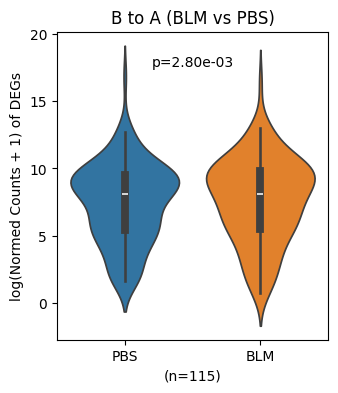

In [27]:
plt.figure(figsize=(3.5, 4))
sns.violinplot(data=dat_pt_avg_log_reshaped, x='condition', y='log_value', hue='condition')
plt.title('B to A (BLM vs PBS)')
plt.xlabel(f'(n={dat_pt_avg_log.shape[1]})')
plt.ylabel('log(Normed Counts + 1) of DEGs')
plt.text(0.5, 0.9, f'p={p_value:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('B2A_normCount.pdf', bbox_inches='tight')

# 3.logFC

In [2]:
import pandas as pd
dat = pd.read_csv('/home/lzz/rna/output/diff_blm_pbs.csv', index_col=0)
dat

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001.4,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
ENSMUSG00000000028.15,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
ENSMUSG00000000031.16,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
ENSMUSG00000000037.17,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
ENSMUSG00000000049.11,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...
ENSMUSG00000118425.1,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
ENSMUSG00000118449.1,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
ENSMUSG00000118456.1,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
ENSMUSG00000118458.1,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


In [19]:
dat.index = dat.index.str.split('.').str[0]
dat

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
ENSMUSG00000000028,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
ENSMUSG00000000031,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
ENSMUSG00000000037,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
ENSMUSG00000000049,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...
ENSMUSG00000118425,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
ENSMUSG00000118449,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
ENSMUSG00000118456,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
ENSMUSG00000118458,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


In [22]:
pd.DataFrame(dat.loc[dat['padj'] < 0.05].index).to_csv('rna_sig_genelist.tsv', index=False, header=False, sep='\t')

In [3]:
dat_ab = pd.read_csv('/home/lzz/hic/output/PC/regions.Down_b_vs_s.txt', sep='\t')
print(dat_ab.shape)
dat_ab.head()

(264, 27)


,PeakID (cmd=annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph) (cmd=getDiffExpression.pl /home/u2204084007/output/hic//ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Description,Gene Type,/home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph bedGraph avg over given bp,s vs. b Difference,s vs. b p-value,s vs. b adj. p-value
0,chr19-27800000,chr19,27800000,27840000,+,0.180673,NaN,"intron (NM_001166414, intron 9 of 18)","intron (NM_001166414, intron 9 of 18)",189773,...,"regulatory factor X, 3 (influences HLA class I...",protein-coding,0.181,0.132,-0.494,-0.465,-0.525,-0.651167,0.000008,0.043094
1,chr17-66360000,chr17,66360000,66400000,+,-0.005986,NaN,"exon (NM_001114098, exon 5 of 15)","exon (NM_001114098, exon 5 of 15)",69750,...,microtubule crosslinking factor 1,protein-coding,-0.006,-0.036,-0.600,-0.591,-0.594,-0.574000,0.000012,0.043094
2,chr6-94280000,chr6,94280000,94320000,+,0.210921,NaN,Intergenic,B2_Mm2|SINE|B2,-16083,...,"membrane associated guanylate kinase, WW and P...",protein-coding,0.211,0.196,-0.382,-0.411,-0.354,-0.585833,0.000013,0.043094
3,chr10-70440000,chr10,70440000,70480000,+,-0.413796,NaN,"intron (NM_001359551, intron 4 of 14)",B3A|SINE|B2,19090,...,"family with sequence similarity 13, member C",protein-coding,-0.414,-0.464,-1.036,-1.095,-1.144,-0.652667,0.000015,0.043094
4,chr6-92760000,chr6,92760000,92800000,+,-0.155394,NaN,"intron (NM_175314, intron 38 of 39)","intron (NM_175314, intron 38 of 39)",-73816,...,prickle planar cell polarity protein 2,protein-coding,-0.155,-0.219,-0.808,-0.757,-0.807,-0.603667,0.000015,0.043094


In [4]:
dat_ba = pd.read_csv('/home/lzz/hic/output/PC/regions.Up_b_vs_s.txt', sep='\t')
print(dat_ba.shape)
dat_ba.head()

(305, 27)


,PeakID (cmd=annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph) (cmd=getDiffExpression.pl /home/u2204084007/output/hic//ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Description,Gene Type,/home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph bedGraph avg over given bp,/home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph bedGraph avg over given bp,s vs. b Difference,s vs. b p-value,s vs. b adj. p-value
0,chr10-130360000,chr10,130360000,130400000,+,-0.720641,NaN,Intergenic,Intergenic,14241,...,"vomeronasal 2, receptor 84",protein-coding,-0.721,-0.697,0.065,0.062,0.062,0.772000,0.000002,0.043094
1,chr18-81520000,chr18,81520000,81560000,+,-0.403031,NaN,Intergenic,(TG)n|Simple_repeat|Simple_repeat,452080,...,microRNA 5127,ncRNA,-0.403,-0.403,0.481,0.452,0.359,0.833667,0.000004,0.043094
2,chr12-115160000,chr12,115160000,115200000,+,-0.906716,NaN,Intergenic,ORR1A2-int|LTR|ERVL-MaLR,515794,...,microRNA 6388,ncRNA,-0.907,-0.931,-0.278,-0.281,-0.251,0.649000,0.000006,0.043094
3,chr6-40760000,chr6,40760000,40800000,+,-0.747445,NaN,Intergenic,B4A|SINE|B4,107494,...,"monooxygenase, DBH-like 2",protein-coding,-0.747,-0.758,-0.143,-0.108,-0.149,0.619167,0.000008,0.043094
4,chr7-106760000,chr7,106760000,106800000,+,-0.747274,NaN,Intergenic,L1_Mur3|LINE|L1,10999,...,olfactory receptor 699,protein-coding,-0.747,-0.792,0.061,-0.074,0.054,0.783167,0.000009,0.043094


In [6]:
ab_list = dat.index.intersection(dat_ab['Nearest Ensembl'].unique()).tolist()

In [7]:
ba_list = dat.index.intersection(dat_ba['Nearest Ensembl'].unique()).tolist()

In [12]:
hic_list = ab_list + ba_list
len(hic_list)

240

In [18]:
pd.DataFrame(hic_list).to_csv('hic_sig_genelist.tsv', index=False, header=False, sep='\t') 

In [34]:
dat_sub = dat.loc[hic_list, :]
dat_sub

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000142,852.196599,-0.598590,0.149293,-4.009497,0.000061,0.000523
ENSMUSG00000000884,89.148360,0.301557,0.241264,1.249906,0.211334,0.415994
ENSMUSG00000002688,288.344987,-0.466855,0.153060,-3.050137,0.002287,0.012359
ENSMUSG00000006014,72.332266,0.400220,0.430754,0.929116,0.352829,0.573226
ENSMUSG00000015533,1048.691415,-0.276292,0.107469,-2.570889,0.010144,0.042846
...,...,...,...,...,...,...
ENSMUSG00000093668,2.235910,-1.241699,1.468515,-0.845547,0.397805,NaN
ENSMUSG00000095788,275.515226,0.037441,0.173508,0.215786,0.829155,0.917939
ENSMUSG00000096630,2.415386,-2.720260,1.555152,-1.749193,0.080258,NaN
ENSMUSG00000097069,2.119859,-1.771533,1.421359,-1.246366,0.212630,NaN


In [35]:
dat_sub['state'] = ['B to A' if x in ba_list else 'A to B' for x in dat_sub.index]
dat_sub['state'].value_counts()

state
A to B    125
B to A    115
Name: count, dtype: int64

In [36]:
condition1 = dat_sub[dat_sub['state'] == 'A to B']['log2FoldChange']
condition2 = dat_sub[dat_sub['state'] == 'B to A']['log2FoldChange']
w_statistic, p_value = stats.ranksums(condition1, condition2, alternative='less')
w_statistic, p_value

(-5.5564223632317296, 1.3768005554500298e-08)

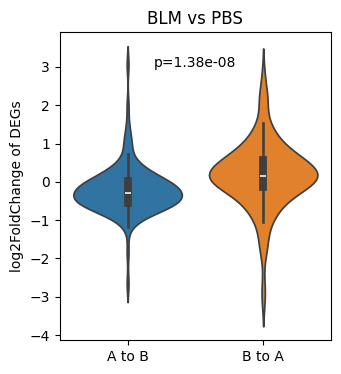

In [38]:
plt.figure(figsize=(3.5, 4))
sns.violinplot(data=dat_sub, x='state', y='log2FoldChange', hue='state')
plt.title('BLM vs PBS')
plt.xlabel('')
plt.ylabel('log2FoldChange of DEGs')
plt.text(0.5, 0.9, f'p={p_value:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('BLM_vs_PBS.pdf', bbox_inches='tight')

In [201]:
dat_sub.sort_values('log2FoldChange', ascending=False).head(10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,state
ENSMUSG00000048978,1.687040,3.055469,2.259881,1.352048,1.763598e-01,NaN,A to B
ENSMUSG00000019122,3464.778264,2.801527,0.160722,17.430878,4.810210e-68,2.955530e-65,B to A
ENSMUSG00000090176,35.954302,2.345101,0.387508,6.051742,1.432877e-09,3.152330e-08,B to A
ENSMUSG00000056124,361.437647,2.128570,0.163998,12.979204,1.605401e-38,3.783469e-36,B to A
ENSMUSG00000030077,26.650621,2.125752,0.511068,4.159427,3.190464e-05,2.943096e-04,B to A
ENSMUSG00000041324,84.365158,2.097411,0.356285,5.886897,3.935139e-09,8.035952e-08,B to A
ENSMUSG00000037747,1.848653,1.977280,1.777388,1.112464,2.659387e-01,NaN,A to B
ENSMUSG00000021322,135.576617,1.541745,0.249843,6.170862,6.791850e-10,1.576882e-08,B to A
ENSMUSG00000092528,84.446346,1.514618,0.272468,5.558876,2.715176e-08,4.647950e-07,B to A
ENSMUSG00000026344,11.399863,1.455614,0.761335,1.911923,5.588607e-02,1.634587e-01,A to B


In [202]:
dat_sub.sort_values('log2FoldChange', ascending=True).to_csv('/home/lzz/rna/output/DEGs_hic_rna.txt', sep='\t')